<a href="https://colab.research.google.com/github/erhangultekin/datamanipulation/blob/master/05170000069.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [ ]:

import pandas as pd
survey=pd.read_csv('kaggle_survey_2020_responses.csv',skiprows=[1])
totalRow=len(survey.index)
survey.drop(survey.columns[0], axis=1,inplace=True)
survey.rename(columns={"Q1" : "Age" ,"Q2" :"Gender","Q3" :"Country", "Q4" :"Education" ,"Q5" :"Occupation", "Q6" :"Coding Experience"},inplace=True)
survey.dropna(subset=['Education', 'Occupation','Coding Experience'],inplace=True)
deletedRow=len(survey.index)
print("Deleted Row:",deletedRow)
print("Old Row Number",totalRow)
print("New Row Number:",totalRow-deletedRow)

Deleted Row: 19120
Old Row Number 20036
New Row Number: 916


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

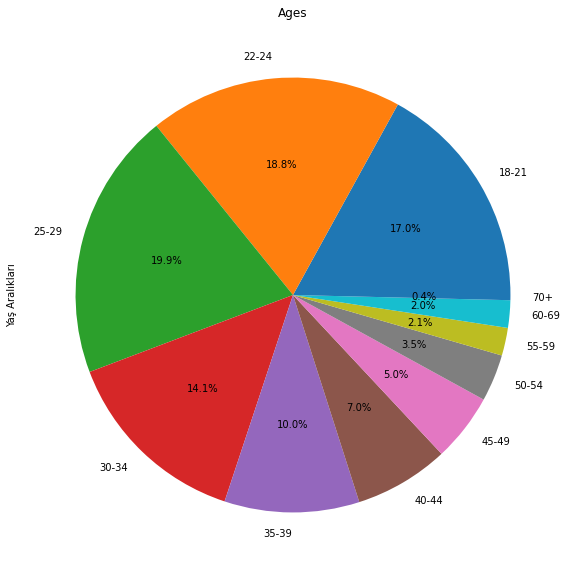

In [ ]:
survey.groupby(['Age']).size().plot.pie(title="Ages",figsize=(10,10),autopct='%1.1f%%', startangle=0,label="Yaş Aralıkları")

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [ ]:
survey.loc[survey['Country']=='Turkey'].groupby(['Education'],as_index=False).size().sort_values(by=['size'],ascending=False)


,Education,size
0,Bachelor’s degree,129
3,Master’s degree,111
1,Doctoral degree,50
6,Some college/university study without earning ...,15
2,I prefer not to answer,8
5,Professional degree,6
4,No formal education past high school,3


## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [ ]:
survey.groupby(['Age','Occupation'],as_index=False).size().sort_values(by=['size'],ascending=False).groupby('Age').first()

,Occupation,size
Age,,
18-21,Student,2510
22-24,Student,1465
25-29,Student,669
30-34,Data Scientist,536
35-39,Data Scientist,356
40-44,Data Scientist,230
45-49,Other,143
50-54,Other,109
55-59,Other,81


## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

,Proggramming Languages,Total User
1,Python,15530
2,SQL,7535
3,R,4277
4,C++,3827
5,Java,3367
6,C,3315
7,Javascript,2995
8,MATLAB,2217
9,Other,1945
10,Bash,1776


---------------------------------------------


,Proggramming Languages,Number of Data Scientists
1,Python,2453
2,SQL,1473
3,R,975
4,Bash,405
5,C++,323
6,Java,305
7,Javascript,290
8,C,247
9,Other,245
10,MATLAB,242


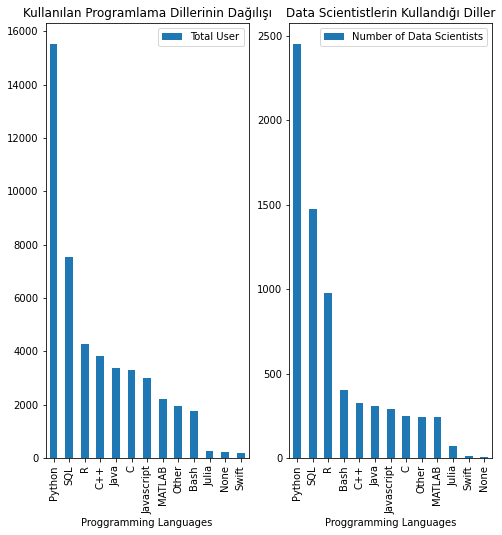

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

all=pd.DataFrame(
    survey[survey.iloc[:, 6:19].columns]
    .melt(var_name='column', value_name='Proggramming Languages')
    .value_counts()).rename(columns={0: 'Total User'})
datasc=survey.loc[survey['Occupation']=='Data Scientist']
ds=datasc[survey.iloc[:, 6:19].columns].melt(var_name='column', value_name='Proggramming Languages').value_counts().to_frame().rename(columns={0: 'Number of Data Scientists'})
all.reset_index(inplace=True)
all.index+=1
ds.reset_index(inplace=True)
ds.index+=1
display(all[all.iloc[:, 1:3].columns])
print("---------------------------------------------")
display(ds[ds.iloc[:, 1:3].columns])
figure, axes = plt.subplots(1, 2,figsize=(8,8))

axes[0].title.set_text("Kullanılan Programlama Dillerinin Dağılışı")
axes[1].title.set_text("Data Scientistlerin Kullandığı Diller")
all.plot.bar(x='Proggramming Languages', y='Total User',ax=axes[0])
ds.plot.bar(x='Proggramming Languages',y='Number of Data Scientists',ax=axes[1])


## Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

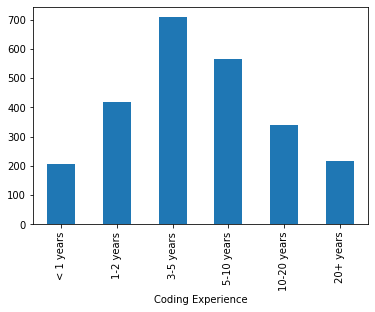

In [ ]:
dss=survey.loc[survey['Occupation']=='Data Scientist'].groupby(['Coding Experience',"Q15"],as_index=False).size()
dss=dss.loc[dss['Q15']!='I do not use machine learning methods']
graph=dss.groupby(['Coding Experience']).sum()
graph=graph.reindex(['< 1 years', '1-2 years', '3-5 years',"5-10 years","10-20 years","20+ years"])
graph['size'].plot.bar()

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [ ]:
set=survey[survey.Q16_Part_1.notnull() & survey.iloc[:,66:81].isnull().all(axis=1)]
dataset=set[survey.iloc[:, 81:93].columns].melt(var_name='column', value_name='').value_counts().to_frame().rename(columns={0: 'counts'})
dataset.reset_index(inplace=True)
dataset.index+=1
display(dataset[dataset.iloc[:, 1:3].columns])
library=survey.groupby(["Q16_Part_1","Q16_Part_2","Q16_Part_3"],as_index=False).size()
library.index+=1
library.rename(columns={'Q16_Part_1' : "Software Library",'Q16_Part_2':'Software Library','Q16_Part_3':'Software Library'},inplace=True)
display(library)

,,counts
1,Linear or Logistic Regression,1683
2,Decision Trees or Random Forests,1292
3,Bayesian Approaches,428
4,"Gradient Boosting Machines (xgboost, lightgbm,...",295
5,Convolutional Neural Networks,138
6,None,105
7,"Dense Neural Networks (MLPs, etc)",68
8,Recurrent Neural Networks,67
9,Other,60
10,Evolutionary Approaches,38


,Software Library,Software Library,Software Library,size
1,Scikit-learn,TensorFlow,Keras,4406


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [ ]:
def average(x):
    if x == '$0-999':
        x='0-0.999'
    if x == '> $500,000':
        return 500.000
    x = x.replace('$','')
    x = x.replace(',','.')
    x = x.split('-')
    x = list(map(float, x))
    if x!="":
        x = (x[0]+x[1])/2
    return x

survey['ConvertedComp'] = survey['Q24'].dropna().apply(average)
orderOccup=survey.groupby('Occupation').ConvertedComp.mean().sort_values(ascending=False).to_frame().reset_index()
orderOccup.index+=1
display(orderOccup)
display(orderOccup[orderOccup['Occupation']=="Data Scientist"])
topTen=survey[survey['Occupation'] == 'Data Scientist'].groupby('Country').ConvertedComp.mean().sort_values(ascending=False).head(10).to_frame()
topTen.reset_index(inplace=True)
topTen.index+=1
display(topTen)
moreThan=survey.loc[(survey.Q20!='50-249 employees') & (survey.Q20!='0-49 employees')]
print("-------------------------------------------------------------------------")
print("250’den fazla kişi çalışan kurumdakilerin ortalama maaşları:",moreThan.ConvertedComp.mean())
print("-------------------------------------------------------------------------")
data = [survey.groupby('Country').ConvertedComp.mean(), survey.groupby('Country').ConvertedComp.median(),survey.groupby('Country').ConvertedComp.std()]
headers = ["Mean", "Median","Std"]
dataSet = pd.concat(data, axis=1, keys=headers)
dataSet.groupby(['Country'],as_index=False)
orderCountry=dataSet.sort_values(by=['Mean'],ascending=False)
orderCountry.reset_index(inplace=True)
orderCountry.index+=1
display(orderCountry.sort_values(by=['Mean'],ascending=False))
orderCountry.loc[(orderCountry['Country']== "Turkey")]




,Occupation,ConvertedComp
1,Product/Project Manager,62.362217
2,Data Scientist,54.477822
3,Data Engineer,50.225114
4,Other,46.755972
5,DBA/Database Engineer,45.872277
6,Research Scientist,45.399798
7,Business Analyst,39.512041
8,Software Engineer,38.562468
9,Machine Learning Engineer,37.625321
10,Statistician,35.626520


,Occupation,ConvertedComp
2,Data Scientist,54.477822


,Country,ConvertedComp
1,United States of America,142.609330
2,Israel,111.979520
3,Switzerland,109.230269
4,Australia,104.318958
5,United Kingdom of Great Britain and Northern I...,89.749505
6,Germany,79.804195
7,Ireland,78.499500
8,Singapore,76.937000
9,Canada,74.466481
10,Thailand,73.707875


-------------------------------------------------------------------------
250’den fazla kişi çalışan kurumdakilerin ortalama maaşları: 56.41082901998156
-------------------------------------------------------------------------


,Country,Mean,Median,Std
1,United States of America,120.321619,112.4995,85.088163
2,Switzerland,120.051583,112.4995,54.795290
3,Israel,109.757328,94.9995,101.749997
4,Australia,87.807330,84.9995,70.029060
5,United Kingdom of Great Britain and Northern I...,82.429511,64.9995,77.980660
6,Germany,73.634271,64.9995,64.869141
7,Canada,73.563896,74.9995,55.076938
8,Netherlands,70.603482,64.9995,38.504895
9,United Arab Emirates,65.777278,64.9995,57.151792
10,Sweden,60.767682,54.9995,33.930787


,Country,Mean,Median,Std
40,Turkey,16.692274,8.7495,43.730238


## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

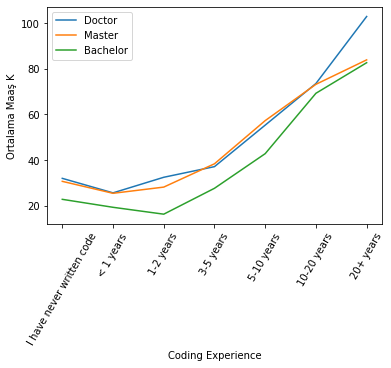

In [ ]:

doctoral=survey.loc[survey['Education']=='Doctoral degree'].groupby(["Coding Experience"],as_index=False).ConvertedComp.mean()
master=survey.loc[survey['Education']=='Master’s degree'].groupby(["Coding Experience"],as_index=False).ConvertedComp.mean()
bachelor=survey.loc[survey['Education']=='Bachelor’s degree'].groupby(["Coding Experience"],as_index=False).ConvertedComp.mean()
doctoral=doctoral.groupby(['Coding Experience']).mean()
master=master.groupby(['Coding Experience']).mean()
bachelor=bachelor.groupby(['Coding Experience']).mean()
fig, ax = plt.subplots()
doctoral.reindex(['I have never written code','< 1 years', '1-2 years', '3-5 years',"5-10 years","10-20 years","20+ years"]).plot.line( y='ConvertedComp',ylabel="Doctor",label="Doctor",ax=ax)
master.reindex(['I have never written code','< 1 years', '1-2 years', '3-5 years',"5-10 years","10-20 years","20+ years"]).plot.line( y='ConvertedComp',ylabel="Master",label="Master",ax=ax)
bachelor.reindex(['I have never written code','< 1 years', '1-2 years', '3-5 years',"5-10 years","10-20 years","20+ years"]).plot.line( y='ConvertedComp',ylabel="Bachelor",label="Bachelor",ax=ax)
plt.xticks(rotation=60)
plt.ylabel("Ortalama Maaş K")
plt.show()

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

Occupation,WomanRatio %
Student,24.00%
Statistician,23.70%
Data Analyst,23.50%
Currently not employed,22.70%
Research Scientist,20.30%
Business Analyst,19.30%
Other,16.80%
Data Scientist,16.40%
Data Engineer,13.90%
Software Engineer,13.30%


-----------------------------------------------


Current Not Employed,Ratio
Man Ratio,8.20%


Current Not Employed,Ratio
Woman Ratio,10.10%


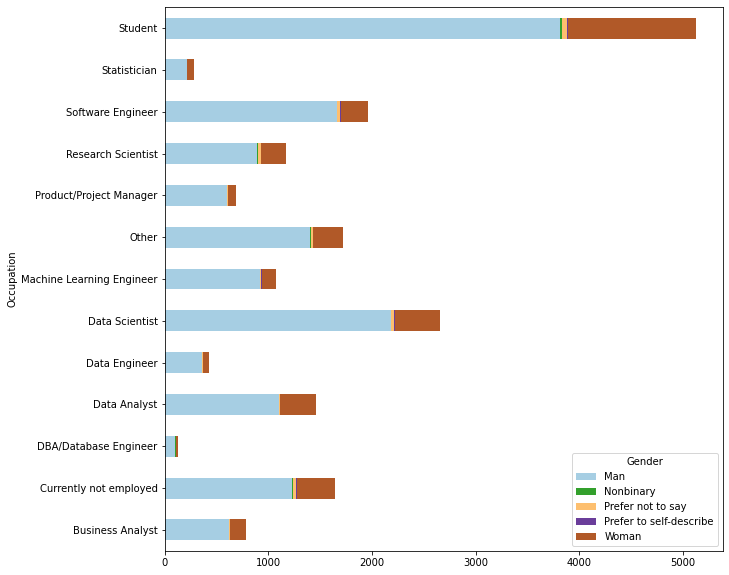

In [ ]:
survey.groupby(['Occupation','Gender']).size().unstack().plot(kind='barh',stacked=True, colormap='Paired', figsize=(10,10))
survey.loc[survey['Gender']=='Woman'].groupby(["Occupation"],as_index=False).size().sort_values(by=['size','Occupation'],ascending=False)

woman_ratio = survey.pivot_table(index='Occupation', columns='Gender', aggfunc='size', fill_value=0)
sums = woman_ratio[['Man', 'Woman','Nonbinary','Prefer not to say','Prefer to self-describe']].sum(axis=1)
woman_ratio['WomanRatio %'] = round(100 * woman_ratio['Woman'] / sums , 1)
woman_ratio['WomanRatio %']=woman_ratio['WomanRatio %'].map("{:,.2f}%".format)
ratioPrint=woman_ratio.sort_values(by=['WomanRatio %'],ascending=False).reset_index()
ratioPrint.index+=1
display(ratioPrint[ratioPrint.iloc[:, [0,6]].columns].style.hide_index())

woman_ratio.reset_index(inplace=True)
notEmployedMan=woman_ratio.loc[woman_ratio['Occupation']=='Currently not employed']['Man']
notEmployedWoman=woman_ratio.loc[woman_ratio['Occupation']=='Currently not employed']['Woman']
totalOccupation=len(survey['Occupation'].index)
pivotTable = survey.pivot_table(columns='Gender',index=None, aggfunc='size', fill_value=0)

pivotTable['Not Employed Man Number']=float(notEmployedMan)
pivotTable['Not Employed Woman Number']=float(notEmployedWoman)
pivotTable['Man Ratio']=round(100 * float(notEmployedMan) / pivotTable['Man'] , 1)
pivotTable['Woman Ratio']=round(100 * float(notEmployedWoman) / pivotTable['Woman'] , 1)

pivotTable=pivotTable.to_frame()
pivotTable.reset_index(inplace=True)
print("-----------------------------------------------")


pivotTable.rename(columns={0 : "Ratio",'Gender':'Current Not Employed'},inplace=True)
pivotTable['Ratio']=pivotTable['Ratio'].map("{:,.2f}%".format)
display(pivotTable.loc[(pivotTable['Current Not Employed']== "Man Ratio")].style.hide_index())
display(pivotTable.loc[(pivotTable['Current Not Employed']== "Woman Ratio")].style.hide_index())


## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

Country,size
India,480
United States of America,293
Other,98
Brazil,42
United Kingdom of Great Britain and Northern Ireland,40
Germany,34
Canada,34
France,30
Taiwan,29
Russia,28


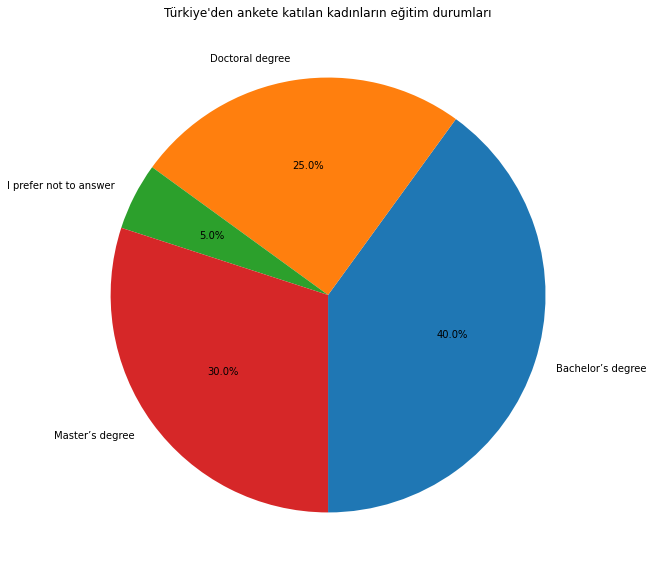

In [ ]:
survey.groupby(['Coding Experience']).size()
experiencedWoman=survey.loc[(survey['Gender']=='Woman') & ((survey['Coding Experience']=='10-20 years') | 
                                          (survey['Coding Experience']=='20+ years') | 
                                          (survey['Coding Experience']=='5-10 years') |
                                          (survey['Coding Experience']=='3-5 years') )]
display(experiencedWoman.groupby(["Country"],as_index=False).size().sort_values(by=['size'],ascending=False).head(10).style.hide_index())
turkishWoman=experiencedWoman.loc[(experiencedWoman['Country']=='Turkey')]
turkishWoman.groupby(['Education']).size().plot.pie(title="Türkiye'den ankete katılan kadınların eğitim durumları",figsize=(10,10),autopct='%1.1f%%', startangle=270,label="")

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [ ]:
survey.iloc[:,243:255]=survey.replace(({"\(.*\)" :""}), regex=True)
display(survey.iloc[:,243:255])
datasc=survey.loc[survey['Age']=='18-21']
dataPrint=datasc[survey.iloc[:,243:255].columns].melt(var_name='column', value_name='value').value_counts().to_frame().rename(columns={0: 'Counts'}).head(10)
dataPrint.reset_index(inplace=True)
dataPrint.index+=1
display(dataPrint[dataPrint.iloc[:, 1:3].columns])


,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,Journal Publications,NaN,NaN,NaN
1,Twitter,NaN,Reddit,Kaggle,Course Forums,YouTube,NaN,Blogs,NaN,Slack Communities,NaN,NaN
2,NaN,Email newsletters,NaN,Kaggle,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20029,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Twitter,NaN,NaN,Kaggle,NaN,YouTube,NaN,Blogs,NaN,NaN,NaN,NaN


,value,Counts
1,Kaggle,1062
2,YouTube,1061
3,Blogs,834
4,Twitter,368
5,Email newsletters,353
6,Course Forums,351
7,Reddit,331
8,Journal Publications,234
9,Slack Communities,214
10,Podcasts,202


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [ ]:
url ='https://download.geonames.org/export/dump/countryInfo.txt'
fields = ['#ISO', 'Country','neighbours']
usecols=fields
country_info = pd.read_csv(url, skiprows=49,sep='\t',index_col ="Country",usecols=fields)
country_info.rename(columns={"#ISO" : "Country Code"},inplace=True)
merged_survey = pd.merge(country_info, survey, on="Country")
display(merged_survey)

,Country,Country Code,neighbours,Age,Gender,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp
0,United Arab Emirates,AE,"SA,OM",30-34,Man,Master’s degree,Research Scientist,5-10 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.9995
1,United Arab Emirates,AE,"SA,OM",40-44,Man,Professional degree,Other,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.4995
2,United Arab Emirates,AE,"SA,OM",30-34,Man,Doctoral degree,Product/Project Manager,3-5 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,NaN,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.9995
3,United Arab Emirates,AE,"SA,OM",25-29,Man,Bachelor’s degree,Other,< 1 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4995
4,United Arab Emirates,AE,"SA,OM",30-34,Man,Master’s degree,Software Engineer,< 1 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,"Automated model selection (e.g. auto-sklearn, ...",Automated model architecture searches (e.g. da...,Automated hyperparameter tuning (e.g. hyperopt...,NaN,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,DataRobot AutoML,NaN,NaN,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,Polyaxon,Trains,NaN,NaN,NaN,64.9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14788,South Africa,ZA,"ZW,SZ,MZ,BW,NA,LS",22-24,Man,No formal education past high school,Student,< 1 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automat

## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [ ]:
countryListsplitted=merged_survey.loc[(merged_survey['Country']=='Germany')].iloc[0].neighbours.split(",")
countryListsplitted.append('DE')
ratioCountry=merged_survey.loc[(merged_survey['Country Code'].isin(countryListsplitted)==True) 
                  & (merged_survey['Education']=='Doctoral degree')].groupby(["Country"],as_index=False).size()
sumsCountry=ratioCountry['size'].sum()
ratioCountry['New Ratio']=round(100 * ratioCountry['size'] / sumsCountry , 1)
ratioCountry['New Ratio']=ratioCountry['New Ratio'].map("{:,.2f}%".format)
ratioCountry.index+=1
ratioCountry.sort_values(by=['Country'])



,Country,size,New Ratio
1,Belgium,13,5.10%
2,France,75,29.50%
3,Germany,99,39.00%
4,Netherlands,23,9.10%
5,Poland,22,8.70%
6,Switzerland,22,8.70%
